# Robert's Second Lab 
## doing actual data science!

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymatgen as mp
from pprint import pprint

## Question 1

In [2]:
orig_data = pd.read_csv("data.csv", na_filter=False)
orig_data.head()

,task_id,formula,formation_energy_per_atom,e_above_hull,band_gap,has_bandstructure
0,mp-1007923,CrNi3,-0.016354,0.000802,0.0,False
1,mp-1008754,TbHg2,-0.069428,0.329909,0.0,True
2,mp-1016886,MgVO3,-2.241438,0.545977,0.0,True
3,mp-1018902,PrSbPt,-1.111238,0.000000,0.0,True
4,mp-1020595,Rb8PO3,-0.772860,0.491666,0.0,True


**1.1 How many elements?**

In [3]:
orig_data.shape

(124515, 6)

In [4]:
orig_data.describe(include="all")

,task_id,formula,formation_energy_per_atom,e_above_hull,band_gap,has_bandstructure
count,124515,124515,124515.000000,124515.000000,124515.000000,124515
unique,124515,89466,NaN,NaN,NaN,2
top,mp-1019324,Li9Mn2Co5O16,NaN,NaN,NaN,False
freq,1,689,NaN,NaN,NaN,71688
mean,NaN,NaN,-1.410472,0.148873,1.075733,NaN
std,NaN,NaN,1.211580,0.420030,1.525219,NaN
min,NaN,NaN,-4.618361,0.000000,0.000000,NaN
25%,NaN,NaN,-2.408562,0.000000,0.000000,NaN
50%,NaN,NaN,-1.438384,0.030278,0.110600,NaN
75%,NaN,NaN,-0.459684,0.101252,1.900000,NaN


In [5]:
orig_data['formula'].describe()

count           124515
unique           89466
top       Li9Mn2Co5O16
freq               689
Name: formula, dtype: object

In [6]:
orig_data['composition'] = [mp.Composition(c) for c in orig_data['formula']]

In [7]:
holder1 = 'abc'
for i in orig_data['formula']:
    if len(holder1) < len(i):
        holder1 = i
print(holder1)

K4Ba2Na4Ti8MnSi16(W4O29)2


In [8]:
holder1 = 'abc'
for i in orig_data['formula']:
    if len(holder1) > len(i):
        holder1 = i
print(holder1)

U


In [9]:
orig_data['composition']

0                    (Cr, Ni)
1                    (Tb, Hg)
2                  (Mg, V, O)
3                (Pr, Sb, Pt)
4                  (Rb, P, O)
                 ...         
124510            (Zn, Mo, O)
124511             (Mg, V, O)
124512            (Ca, Co, O)
124513     (Ca, La, Cr, W, O)
124514    (Ca, La, Cr, Sn, O)
Name: composition, Length: 124515, dtype: object

In [17]:
orig_data['n_el'] = [len(i) for i in orig_data['composition']]

**1.2: Max elements in single structure?**

Answer is 9

In [20]:
orig_data['n_el'].describe()

count    124515.000000
mean          3.319062
std           0.905356
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           9.000000
Name: n_el, dtype: float64

**1.3 Plot distribution of #elements per structure in the dataset**

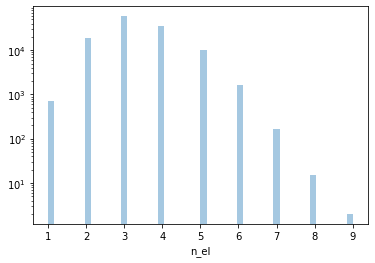

In [28]:
ax = sns.distplot(orig_data['n_el'], kde=False)
ax.set_yscale('log')

**1.4 Finding 10 most common and 10 least commonly occuring elements in compounds**

In [42]:
#instantiate the dictionary
element_occurrences = {}
# look through every entry in the composition column
for comp in orig_data['composition']:
    #look through every element in each composition
    for element in comp:
        #if we haven't seen this element before, add it to our dictionary
        #and set the count equal to 1 (first occurence!)
        if element not in element_occurrences:
            element_occurrences[element] = 1
        # if we've seen it before, add another occurence to the count
        elif element in element_occurrences:
            # add 1 to the count of the element
            element_occurrences[element] += 1
            # element_occurrences[element] = element_occurrences[element] + 1

In [44]:
pprint(element_occurrences)

{Element Cs: 3549,
 Element K: 6398,
 Element Rb: 3814,
 Element Ba: 6092,
 Element Na: 7296,
 Element Sr: 5117,
 Element Li: 18580,
 Element Ca: 6328,
 Element Ac: 297,
 Element La: 4256,
 Element Tb: 1741,
 Element Yb: 1872,
 Element Ce: 2650,
 Element Pm: 515,
 Element Pr: 2276,
 Element Nd: 2574,
 Element Sm: 2335,
 Element Eu: 1610,
 Element Gd: 1444,
 Element Dy: 1874,
 Element Y: 3814,
 Element Ho: 1886,
 Element Er: 1930,
 Element Tm: 1495,
 Element Lu: 1465,
 Element Pu: 388,
 Element Hf: 1642,
 Element Th: 972,
 Element Mg: 8711,
 Element Zr: 2722,
 Element Np: 340,
 Element Sc: 2060,
 Element U: 2061,
 Element Pa: 253,
 Element Ta: 2384,
 Element Ti: 5723,
 Element Mn: 11233,
 Element Be: 1065,
 Element Nb: 3248,
 Element Al: 6446,
 Element Tl: 2632,
 Element V: 7276,
 Element Zn: 5235,
 Element Cr: 5368,
 Element Cd: 2880,
 Element In: 3599,
 Element Ga: 4024,
 Element Fe: 10109,
 Element Co: 8612,
 Element Cu: 7999,
 Element Re: 1313,
 Element Si: 8940,
 Element Tc: 648,
 

/home/rramji/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/home/rramji/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/home/rramji/miniconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)


In [122]:
for i in element_occurrences:
    element_occurrences[i] = [element_occurrences[i]]
orig_data_elements = pd.DataFrame(element_occurrences)
df = orig_data_elements.T
df['count'] = df[0]
df = df.drop(0, axis=1)
df = df.sort_values(by=['count'])

**10 least commonly occuring elements, number of occurences in compounds**

In [123]:
df.head(10)

,count
Ne,[1]
Ar,[2]
He,[8]
Kr,[15]
Xe,[147]
Pa,[253]
Ac,[297]
Np,[340]
Pu,[388]
Pm,[515]


**10 most commonly occuring elements, number of occurences in compounds**

In [124]:
df.tail(10)

,count
Mg,[8711]
Si,[8940]
F,[9606]
N,[9723]
Fe,[10109]
S,[10516]
Mn,[11233]
P,[13321]
Li,[18580]
O,[60428]


## Question 2

In [111]:
for i in orig_data['composition']:
    if i.contains_element_type('noble_gas'):
        print(i)

Ni1 Xe2 F16
He1 Si1 O2
Xe2 N1 O2 F13
Mg1 As2 Xe2 F18
Hg1 Sb3 Xe1 F17
Xe1 F3
Cu1 Sb2 Xe2 F16
Hg1 P2 Xe5 F22
Kr1
Au1 Xe1 F9
As1 Xe1 O3 F6
Sb1 Xe2 O1 F15
Sb1 Xe1 F9
P2 Pb1 Xe3 F18
Sb1 Xe1 O2 F7
Cu1 Sb2 Xe6 F24
He1
Os1 Xe2 O3 F14
As1 Xe1 O2 F7
Te1 As1 Xe1 O2 F11
As1 S1 Xe1 N1 F10
Ba1 Sb2 Xe5 F22
Cd1 B2 Xe1 F10
Xe1
Fe4 Ag1 Xe1 F5
Xe1
Na4 Xe1 O12
Xe1 N1 O2 F5
He1 Si1 O2
S1 Xe1 O3 F2
Ne1
Pt1 Xe1 F11
Zn1 Sb3 Xe1 F23
Bi1 Kr1 F7
Kr1
Xe1
Na4 Xe1 O12
Ba1 As2 Xe5 F22
Sb2 Xe1 F15
Nd2 As6 Xe5 F46
Te1 As1 H1 Xe1 N1 F11
Kr1 F2
Cs2 Xe1 Br4 F28
As1 Kr1 F7
As1 Xe2 O1 F10
Ge1 Xe1 F10
Xe1
Hg2 Sb7 H2 Xe3 F59
Os1 Xe1 O4 F6
Sb1 Kr1 F7
Ar1
Ba1 Ru2 Xe5 F22
K4 Xe1 O15
Ca2 As4 Xe5 F34
B1 C6 Xe1 F11
Hg1 Sb2 Xe5 F22
Sb1 Te7 S1 Xe1 Cl1 O9 F36
As1 Xe1 F7
S2 Xe1 N1 O4 F3
Co1 Sb3 Xe1 F23
Sb4 Au1 Xe4 F22
Xe1 N2 O2 F8
Au1 Xe2 F17
Fe4 Ag1 P1 Xe2 F6
Xe1 O3
Xe1
Sr1 As2 Xe3 F18
Sb2 Xe1 F14
Sb1 Xe2 F9
As1 Xe1 F11
Mg1 As2 Xe2 F16
Ba1 P2 Xe4 F20
Sb2 Xe1 F16
Zn1 Sb2 Xe6 F24
Cs1 Xe3 O3 F13
Mn1 Sb3 Xe1 F23
Sb1 Xe1 O1 F9
Sr1 P2 Xe3 

In [115]:
orig_data['contains_noble_gas'] = [i.contains_element_type('noble_gas') for i in orig_data['composition']]

**2.1 how many compounds have noble gases in them? take them out.**

In [117]:
data = orig_data[orig_data['contains_noble_gas']]

In [126]:
orig_data_ignoble = orig_data[orig_data['contains_noble_gas'] == False]

In [121]:
n = data.shape[0]
n

173

In [127]:
orig_data_ignoble.shape

(124342, 9)

In [128]:
orig_data.shape

(124515, 9)

**2.2 Load element properties. How many NaN?**

In [131]:
element_data = 

KeyError: 0